In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
from google.colab import files
upload = files.upload()


Saving Speed Dating Data.csv to Speed Dating Data (1).csv


In [32]:
df = pd.read_csv('Speed Dating Data.csv', engine = 'python')
df.head()



,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,...,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [38]:
preferences_gender = df[['gender','attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].groupby('gender').mean()
preferences_gender



,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
gender,,,,,,
0,18.055224,18.305008,21.002502,17.147292,12.827222,12.704194
1,26.921689,16.498436,19.537374,17.763893,8.552829,10.996574


In [0]:
#what ppl said they liked vs what they chose , probably not useful
attr_pref = sns.scatterplot(x= df.pf_o_att,  y= df.attr_o, hue = df.dec_o)



In [0]:
#importance of interest_corr
df.int_corr = df.int_corr.fillna(df.int_corr.median())

interest_corr = df[['int_corr', 'match']].groupby('match').mean().plot.bar()

#high interest correlation leads to slightly more matches on average


In [0]:
import sklearn as sk
df['attr1_1'] = df['attr1_1'].fillna(df['attr1_1'].median())
df['sinc1_1'] = df['sinc1_1'].fillna(df['sinc1_1'].median())
df['intel1_1'] = df['intel1_1'].fillna(df['intel1_1'].median())
df['fun1_1'] = df['fun1_1'].fillna(df['fun1_1'].median())
df['amb1_1'] = df['amb1_1'].fillna(df['amb1_1'].median())
df['shar1_1'] = df['shar1_1'].fillna(df['shar1_1'].median())


sk.preprocessing.normalize(df[['attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']], norm='l2', axis=1, copy=True, return_norm=False)

df['pf_o_att'] = df['pf_o_att'].fillna(df['pf_o_att'].median())
df['pf_o_sin'] = df['pf_o_sin'].fillna(df['pf_o_sin'].median())
df['pf_o_int'] = df['pf_o_int'].fillna(df['pf_o_int'].median())
df['pf_o_fun'] = df['pf_o_fun'].fillna(df['pf_o_fun'].median())
df['pf_o_amb'] = df['pf_o_amb'].fillna(df['pf_o_amb'].median())
df['pf_o_sha'] = df['pf_o_sha'].fillna(df['pf_o_sha'].median())

normal_pf_o = sk.preprocessing.normalize(df[['pf_o_att', 'pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha']], norm='l2', axis=1, copy=True, return_norm=False)
plt.figure(figsize = (20,8))
sns.distplot(normal_pf_o, color = ['red', 'green', 'yellow', 'pink', 'orange', 'black'])
plt.show()






#diff = normal_pf_o - normal_o
#plt.figure(figsize = (20,8))
#sns.distplot(diff, color = ['red', 'green', 'yellow', 'pink', 'orange', 'black'])
#plt.legend(diff)

In [0]:
df['attr_o'] = df['attr_o'].fillna(df['attr_o'].median())
df['sinc_o'] = df['sinc_o'].fillna(df['sinc_o'].median())
df['intel_o'] = df['intel_o'].fillna(df['intel_o'].median())
df['fun_o'] = df['fun_o'].fillna(df['fun_o'].median())
df['amb_o'] = df['amb_o'].fillna(df['amb_o'].median())
df['shar_o'] = df['shar_o'].fillna(df['shar_o'].median())

normal_o = sk.preprocessing.normalize(df[['attr_o', 'sinc_o','intel_o','fun_o','amb_o','shar_o']], norm='l2', axis=1, copy=True, return_norm=False)

normal_o = sk.preprocessing.normalize(df[['pf_o_att', 'pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha']], norm='l2', axis=1, copy=True, return_norm=False)
plt.figure(figsize = (20,8))
sns.distplot(normal_o, color = ['red', 'green', 'yellow', 'pink', 'orange', 'black'])
plt.show()

In [45]:
from math import pi
 
# Set data
dataset_radar = pd.DataFrame({
'group': ['Homme','Femme'],
'Attractive': [preferences_gender.iloc[1,0], preferences_gender.iloc[0,0]],
'Sincere': [preferences_gender.iloc[1,1], preferences_gender.iloc[0,1]],
'Intelligence': [preferences_gender.iloc[1,2], preferences_gender.iloc[0,2]],
'Funny': [preferences_gender.iloc[1,3], preferences_gender.iloc[0,3]],
'Ambitious': [preferences_gender.iloc[1,4], preferences_gender.iloc[0,4]],
'Shared Interest': [preferences_gender.iloc[1,5], preferences_gender.iloc[0,5]]
})

print(dataset_radar)


   group  Attractive    Sincere  ...      Funny  Ambitious  Shared Interest
0  Homme   26.921689  16.498436  ...  17.763893   8.552829        10.996574
1  Femme   18.055224  18.305008  ...  17.147292  12.827222        12.704194

[2 rows x 7 columns]


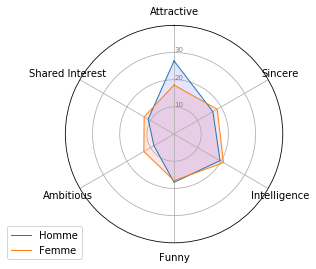

In [52]:
# number of variable
categories=list(dataset_radar)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
 
# ------- PART 2: Add plots

 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=dataset_radar.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Homme")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=dataset_radar.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Femme")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

In [0]:
preferences_gender2 = df[['gender','attr2_1', 'sinc2_1','intel2_1','fun2_1','amb2_1','shar2_1']].groupby('gender').mean()



# Set data
dataset_radar2 = pd.DataFrame({
'group': ['Homme','Femme'],
'Attractive': [preferences_gender2.iloc[1,0], preferences_gender2.iloc[0,0]],
'Sincere': [preferences_gender2.iloc[1,1], preferences_gender2.iloc[0,1]],
'Intelligence': [preferences_gender2.iloc[1,2], preferences_gender2.iloc[0,2]],
'Funny': [preferences_gender2.iloc[1,3], preferences_gender2.iloc[0,3]],
'Ambitious': [preferences_gender2.iloc[1,4], preferences_gender2.iloc[0,4]],
'Shared Interest': [preferences_gender2.iloc[1,5], preferences_gender2.iloc[0,5]]
})




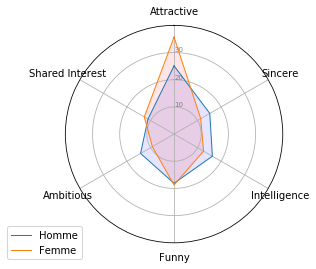

In [61]:
# number of variable
categories=list(dataset_radar2)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
 
# ------- PART 2: Add plots

 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=dataset_radar2.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Homme")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=dataset_radar2.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Femme")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

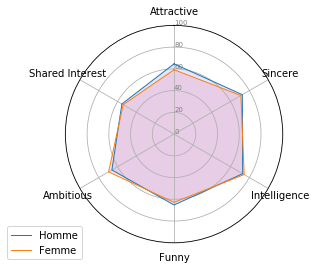

In [68]:
preferences_gender3 = df[['gender','attr', 'sinc','intel','fun','amb','shar']].groupby('gender').mean() * 10
# Set data
dataset_radar3 = pd.DataFrame({
'group': ['Homme','Femme'],
'Attractive': [preferences_gender3.iloc[1,0], preferences_gender3.iloc[0,0]],
'Sincere': [preferences_gender3.iloc[1,1], preferences_gender3.iloc[0,1]],
'Intelligence': [preferences_gender3.iloc[1,2], preferences_gender3.iloc[0,2]],
'Funny': [preferences_gender3.iloc[1,3], preferences_gender3.iloc[0,3]],
'Ambitious': [preferences_gender3.iloc[1,4], preferences_gender3.iloc[0,4]],
'Shared Interest': [preferences_gender3.iloc[1,5], preferences_gender3.iloc[0,5]]
})


categories=list(dataset_radar3)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,20,40,60,80,100], ["0",'20',"40", '60', '80', '100'], color="grey", size=7)
plt.ylim(0,100)
 
 
# ------- PART 2: Add plots

 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=dataset_radar3.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Homme")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=dataset_radar3.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Femme")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

